In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('ecosystem_data.csv')
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [19]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [20]:
data['ecosystem_health'] = data['ecosystem_health'].map({'degraded': 2, 'at risk': 1, 'healthy': 0})

In [21]:
X = data[['water_quality', 'air_quality_index', 'biodiversity_index', 'vegetation_cover', 'soil_ph']]
y = data['ecosystem_health']

In [35]:
from imblearn.over_sampling import SMOTE


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph
9254,77.081452,44.062354,0.949299,46.152811,5.150273
1561,23.687056,76.109049,0.175198,4.897138,8.419876
1670,38.062329,101.011701,0.477240,14.213099,6.244852
6087,20.598818,261.304286,0.804825,1.258247,8.155222
6669,13.031799,104.563995,0.128350,6.560235,8.694970
...,...,...,...,...,...
5734,67.712426,151.875520,0.257569,81.289604,8.771018
5191,70.080842,22.033407,0.976313,26.417028,6.464961
5390,13.945024,44.879297,0.195557,94.294212,7.292809
860,77.552762,284.861231,0.278111,16.423641,3.520822


In [23]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9515

In [26]:
print("______________classifictaiton report_______________")
print()
report = classification_report(y_test, y_pred, target_names=['healthy', 'at risk', 'degraded'])
print(report)

______________classifictaiton report_______________

              precision    recall  f1-score   support

     healthy       0.86      0.29      0.43        21
     at risk       0.90      0.63      0.74       222
    degraded       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



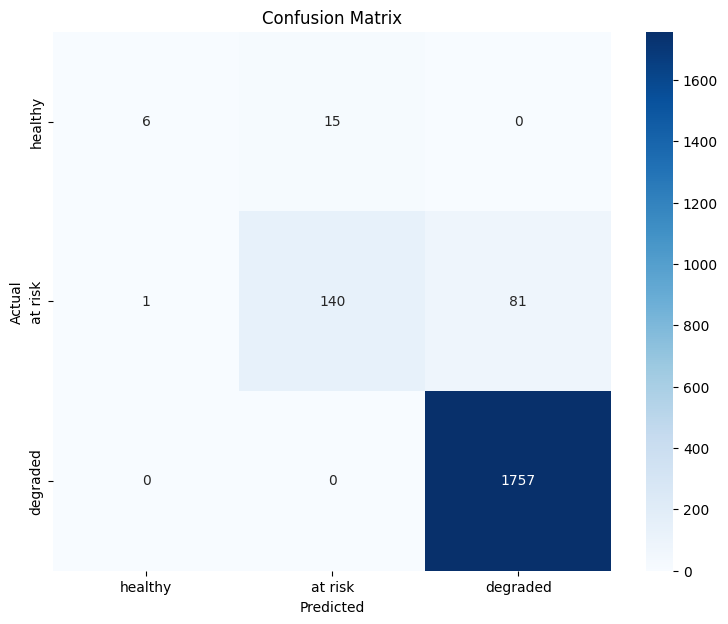

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['healthy', 'at risk', 'degraded'], yticklabels=['healthy', 'at risk', 'degraded'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
import joblib 

In [29]:
joblib.dump(model, 'Ecosystem_helth_calculator.pkl')

['Ecosystem_helth_calculator.pkl']

In [30]:
eco_health=joblib.load('Ecosystem_helth_calculator.pkl')

In [31]:
X.columns

Index(['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph'],
      dtype='object')

In [33]:
# Suggest input values for testing:
# Enter the water quality: 50.0
# Enter AQI: 100.0
# Enter BDI: 0.5
# Enter the vegetation cover: 60.0
# Enter the soil pH: 6.5

wq = float(input("Enter the water quality: "))
aqi = float(input("Enter AQI: "))
bdi = float(input("Enter BDI: "))
vc = float(input("Enter the vegetation cover: "))
sph = float(input("Enter the soil pH: "))

new_data = np.array([[wq, aqi, bdi, vc, sph]])

prediction = eco_health.predict(new_data)
print(f"The ecosystem health for water quality {wq}, AQI {aqi}, BDI {bdi}, vegetation cover {vc}, and soil pH {sph} is {prediction[0]}")

The ecosystem health for water quality 60.0, AQI 150.0, BDI 0.6, vegetation cover 65.0, and soil pH 6.0 is 2


C:\Users\m_afz\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [34]:
y.value_counts()

ecosystem_health
2    8761
1    1120
0     119
Name: count, dtype: int64